系统环境
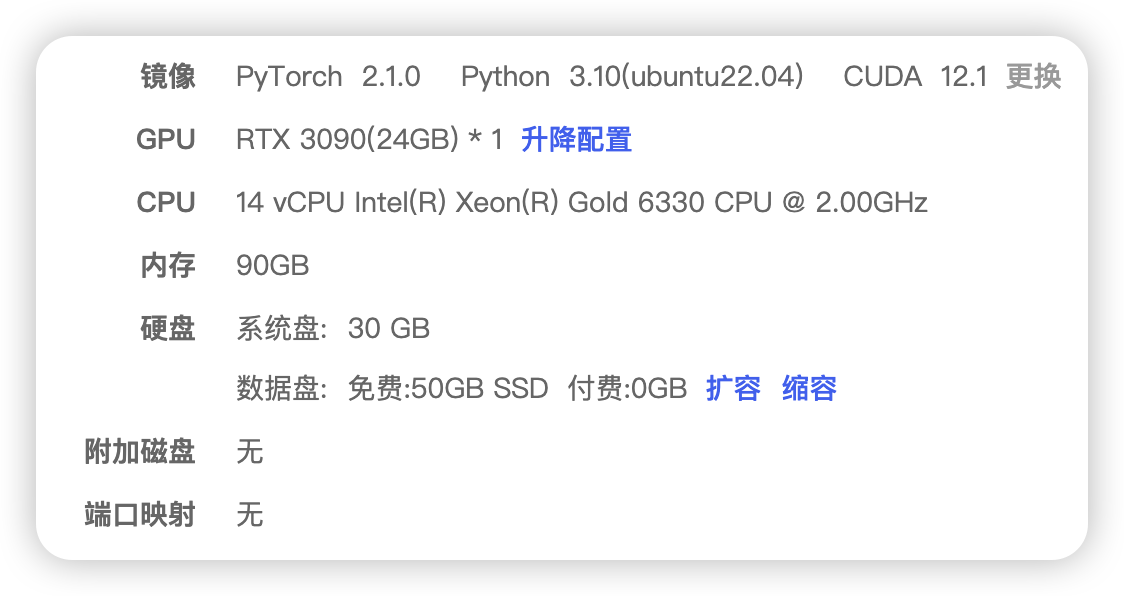

In [1]:
#llamacpp将hf大模型转换为gguf格式

### 一、下载模型

In [ ]:
!pip install modelscope==1.11.0

In [ ]:
#下载模型
# model_download.py
import os
import torch
from modelscope import snapshot_download, AutoModel, AutoTokenizer
model_dir = snapshot_download('qwen/Qwen2-7B-Instruct', cache_dir='/root/autodl-tmp', revision='master')

### 二、下载llama.cpp

In [ ]:
#下载llama.cpp

#开启 学术加速
source /etc/network_turbo

#拉取 llama.cpp 项目
git clone https://github.com/ggerganov/llama.cpp.git

cd llama.cpp

#安装相关依赖
pip install -r requirements.txt

In [ ]:
#当前 单元格的操作需要进入 llama.cpp 文件目录内 进行执行

#方式一、不量化，保留模型的效果
python convert_hf_to_gguf.py 本地模型路径 --outtype f16 --verbose --outfile /root/autodl-tmp/Qwen/qwen3_8b_f16.gguf（模型的输出名字 以.gguf 结尾）

# 方式二、需要量化（加速并有损效果）
python convert_hf_to_gguf.py 本地模型路径 --outtype q8_0 --verbose --outfile /root/autodl-tmp/Qwen/qwen3_8b_q8_0.gguf

这里--outtype是输出类型，代表含义：

q2_k：特定张量（Tensor）采用较高的精度设置，而其他的则保持基础级别。
q3_k_l、q3_k_m、q3_k_s：这些变体在不同张量上使用不同级别的精度，从而达到性能和效率的平衡。
q4_0：这是最初的量化方案，使用 4 位精度。
q4_1 和 q4_k_m、q4_k_s：这些提供了不同程度的准确性和推理速度，适合需要平衡资源使用的场景。
q5_0、q5_1、q5_k_m、q5_k_s：这些版本在保证更高准确度的同时，会使用更多的资源并且推理速度较慢。
q6_k 和 q8_0：这些提供了最高的精度，但是因为高资源消耗和慢速度，可能不适合所有用户。
fp16 和 f32: 不量化，保留原始精度。

### 转换结果如下
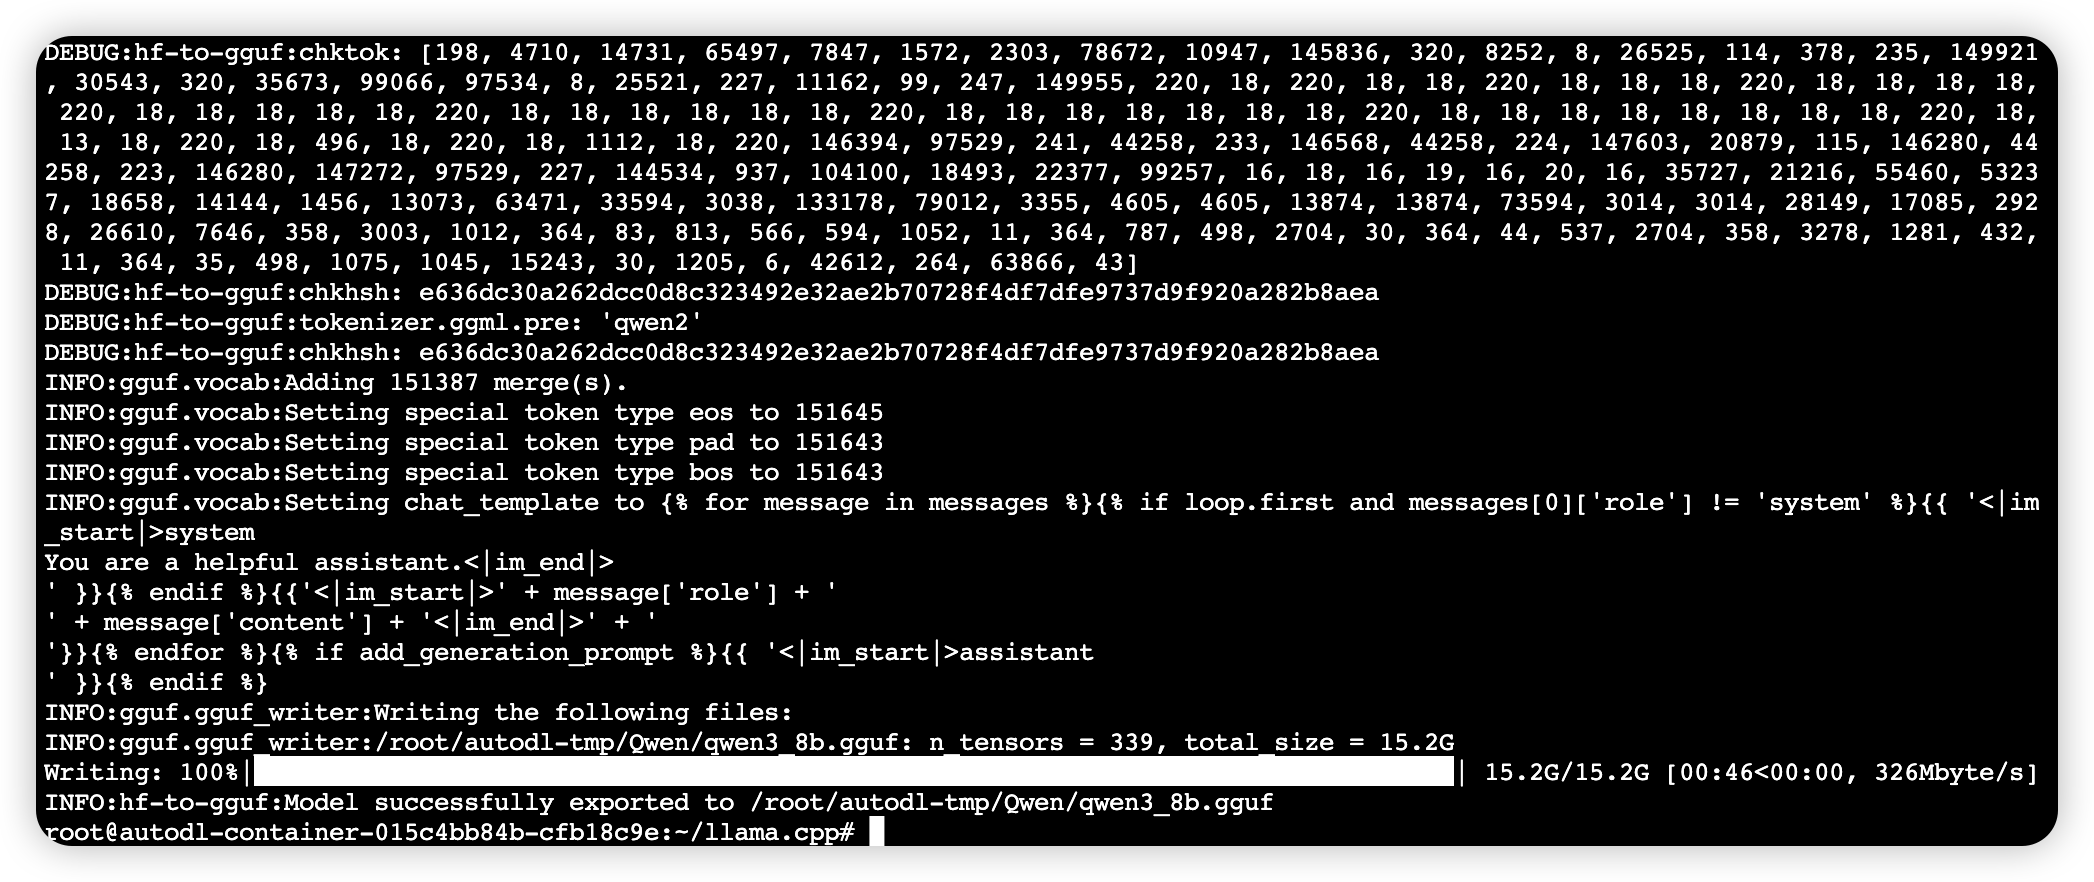

In [ ]:
#安装ollama
#安装命令如下
curl -fsSL https://ollama.com/install.sh | sh


安装成功显示
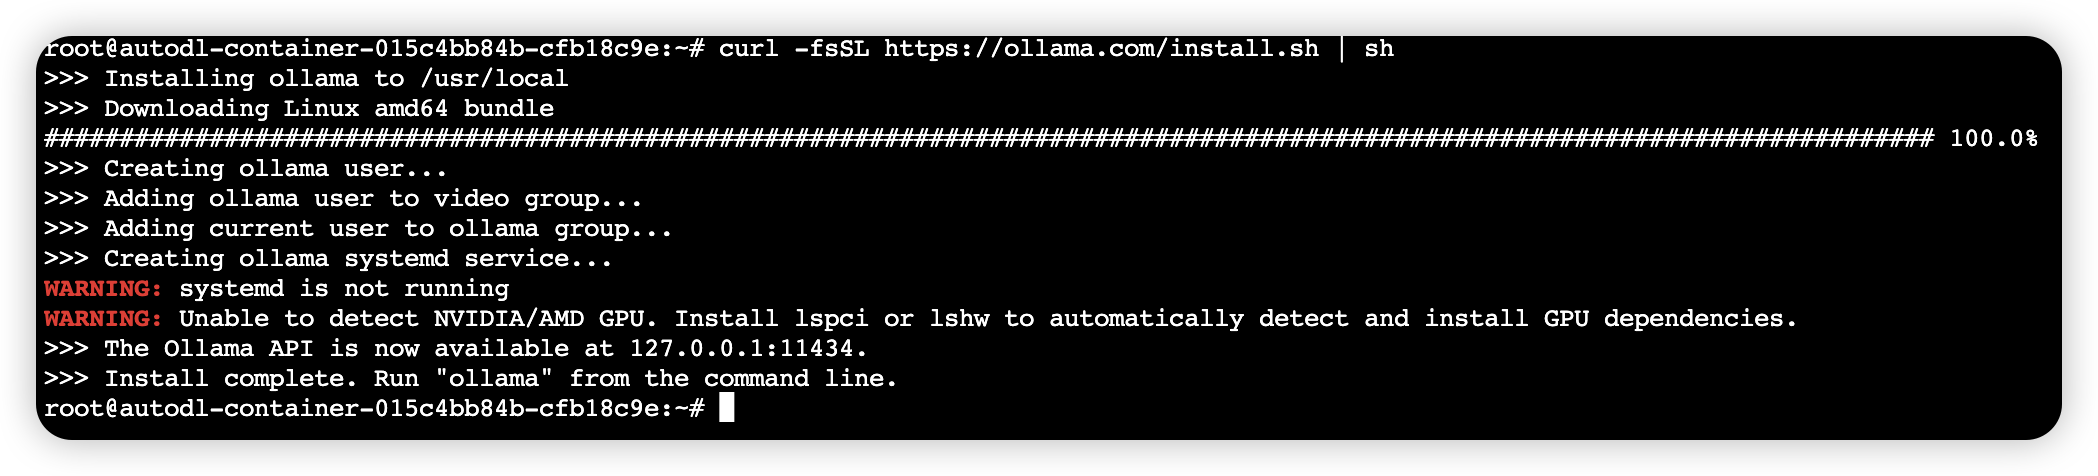

In [ ]:
#启动 ollama 服务
ollama serve

启动成功显示
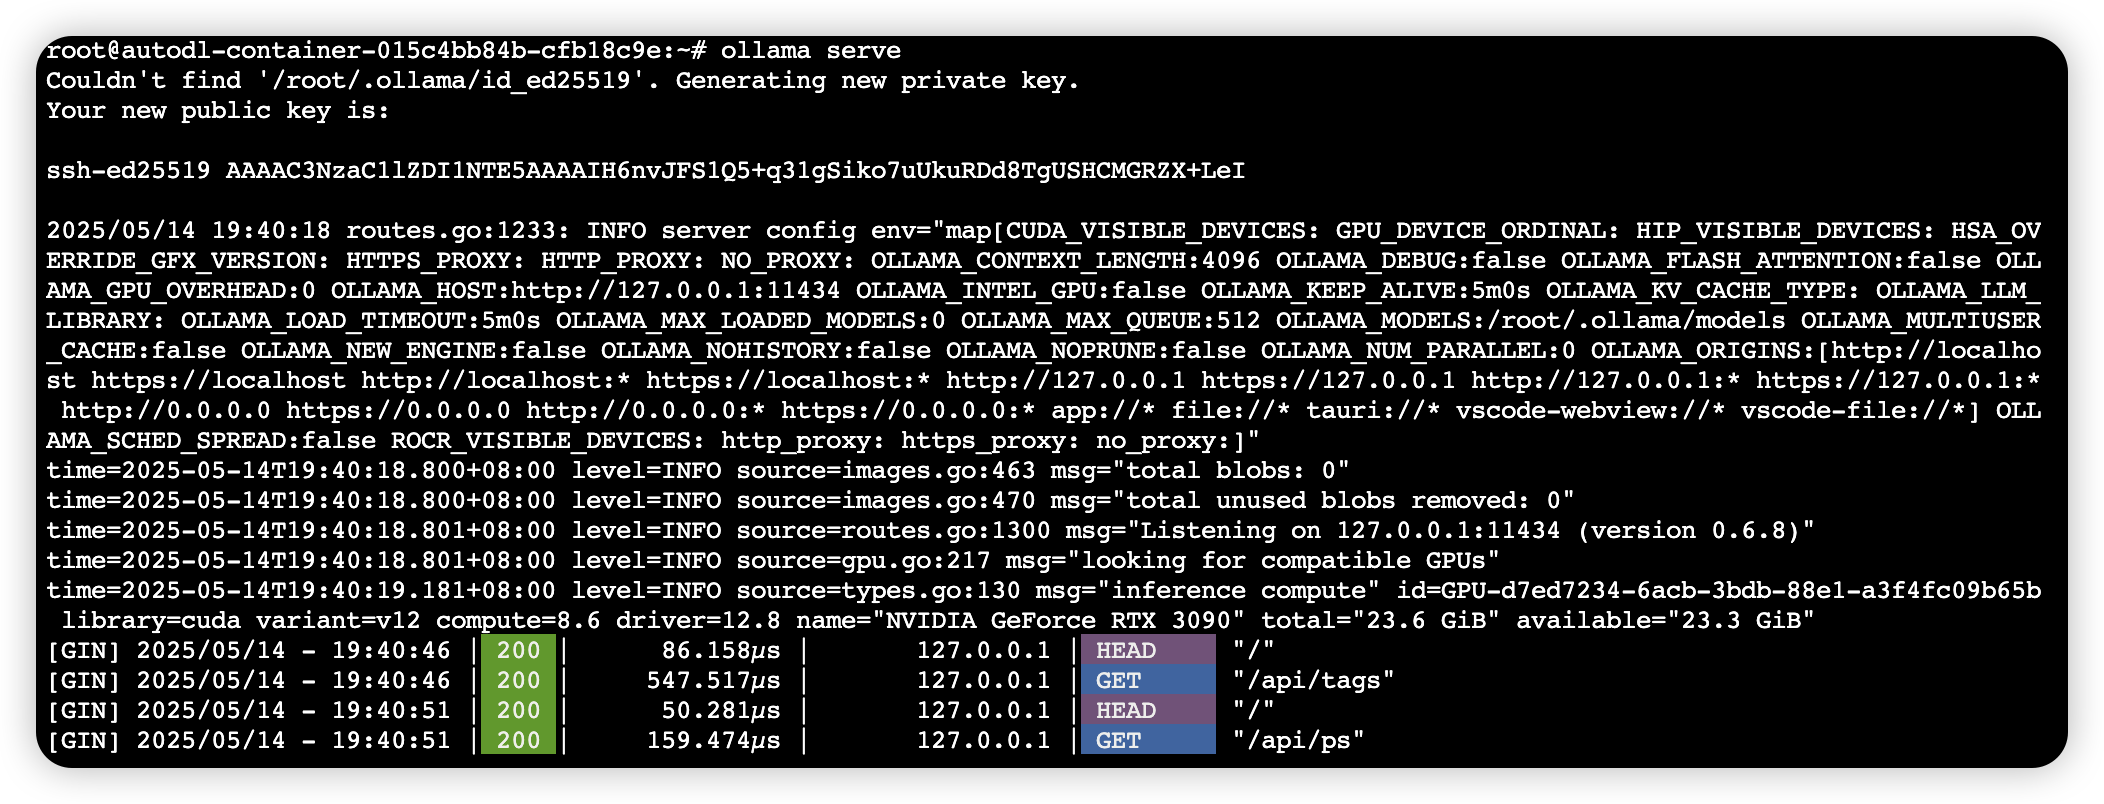

In [2]:
# ollama 如何加载本地 gguf 格式大模型

In [ ]:
#第一步
#制作ModelFile文件
#新建 ModelFile 文件（文件名 为 ModelFile，没有后缀）
#添加内容如下：
FROM gguf格式模型本地路径

# set the temperature to 0.7 [higher is more creative, lower is more coherent]
PARAMETER temperature 0.7
PARAMETER top_p 0.8
PARAMETER repeat_penalty 1.05
TEMPLATE """{{ if .System }}<|im_start|>system
{{ .System }}<|im_end|>
{{ end }}{{ if .Prompt }}<|im_start|>user
{{ .Prompt }}<|im_end|>
{{ end }}<|im_start|>assistant
{{ .Response }}<|im_end|>"""
# set the system message
SYSTEM """
You are a helpful assistant.
"""

In [ ]:
#将模型导入 ollama 中
ollama create qwen3_8b --file ./ModelFile

导入成功显示
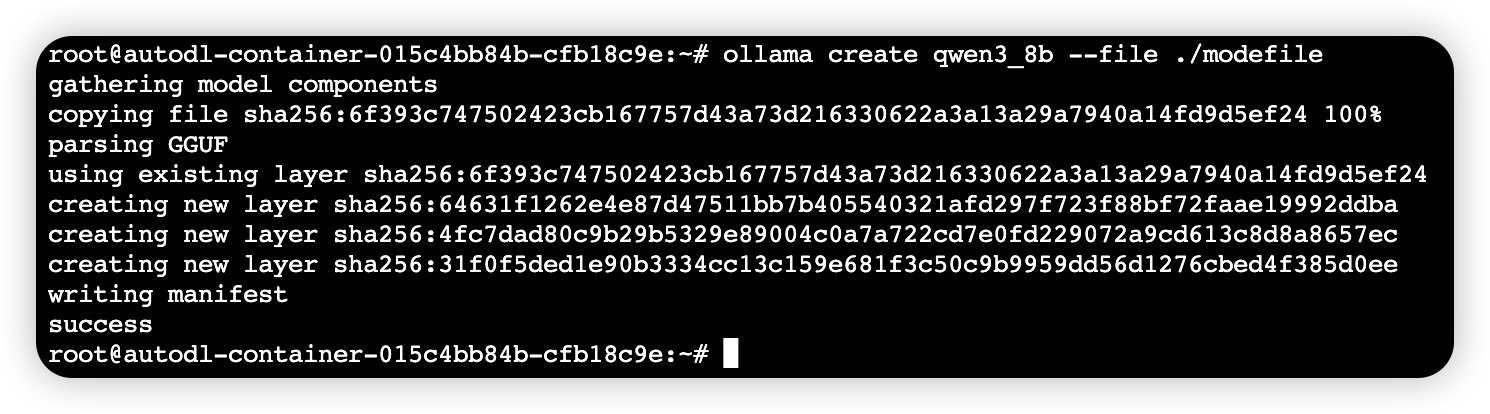

In [ ]:
#查看模型
ollama list

查看模型
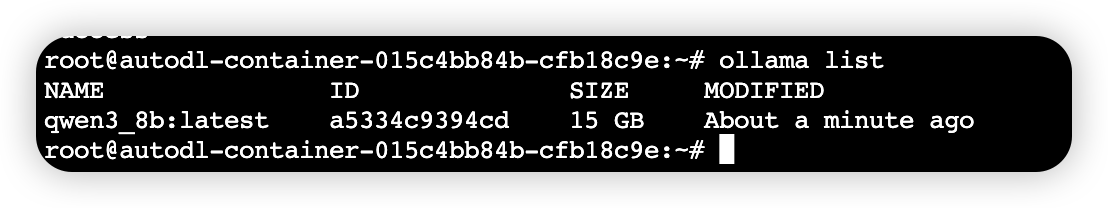

In [ ]:
#运行模型
ollama run qwen3_8b

运行模型
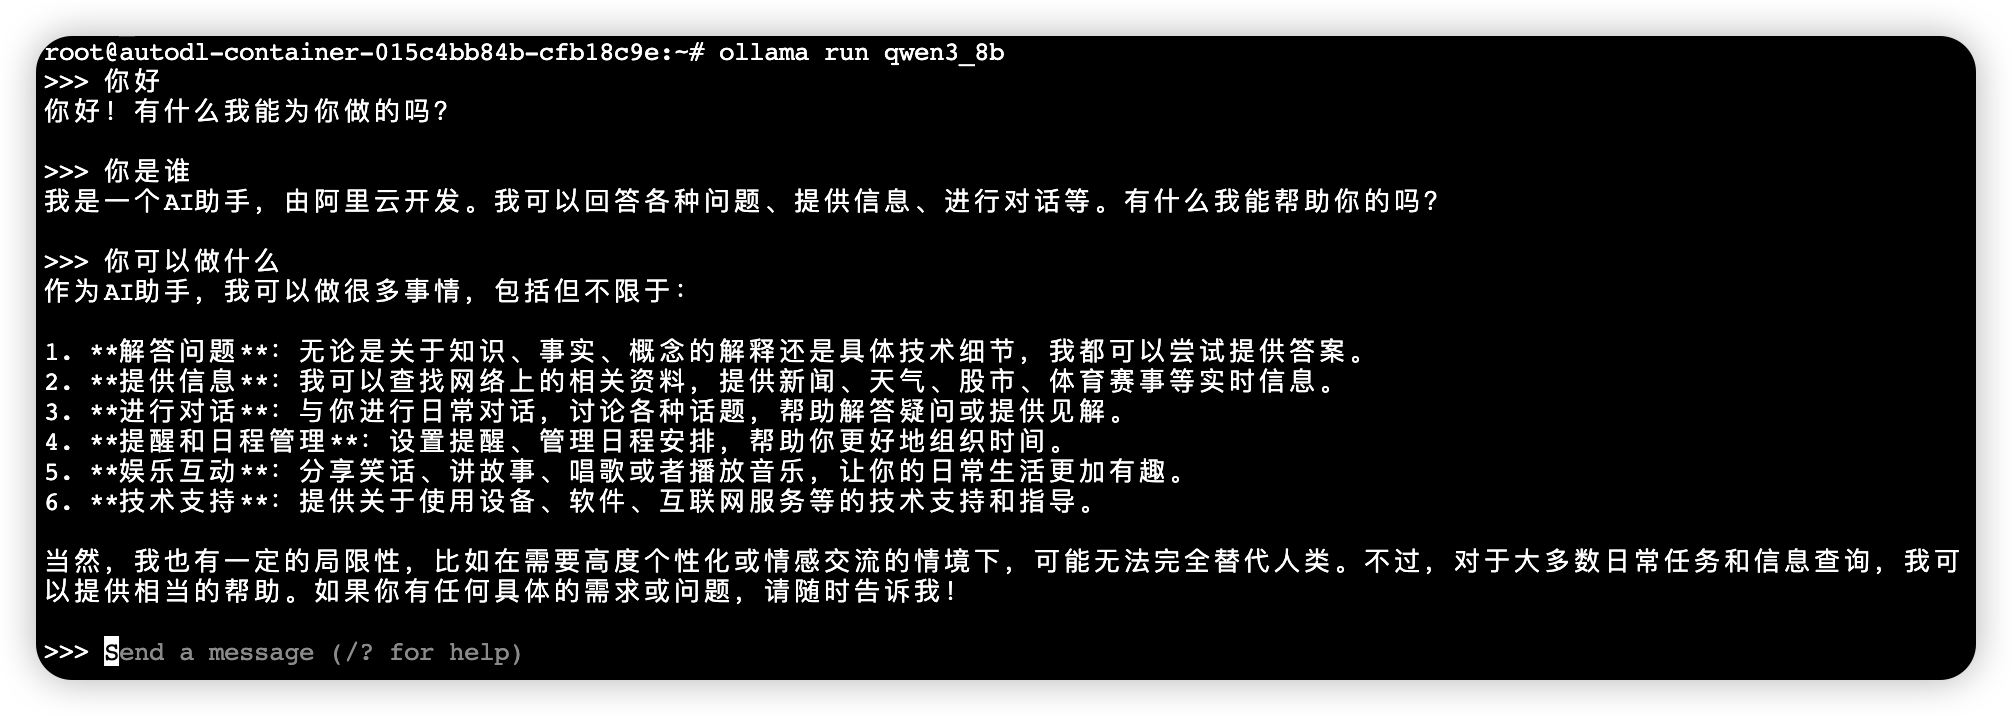